# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from random import uniform
from scipy.stats import linregress
from scipy import stats


# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [3]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

640

In [4]:
cities

['waingapu',
 'cape town',
 'constitucion',
 'qaanaaq',
 'illoqqortoormiut',
 'chapais',
 'bredasdorp',
 'yulara',
 'atuona',
 'coracora',
 'yellowknife',
 'la ronge',
 'cidreira',
 'punta arenas',
 'tuktoyaktuk',
 'biltine',
 'puerto ayora',
 'labuhan',
 'new norfolk',
 'busselton',
 'ushuaia',
 'ancud',
 'tasiilaq',
 'cherskiy',
 'haines junction',
 'papara',
 'coquimbo',
 'kaitangata',
 'nizhneyansk',
 'airai',
 'chuy',
 'tara',
 'hermanus',
 'naze',
 'neiafu',
 'fort nelson',
 'upernavik',
 'mataura',
 'lolua',
 'avarua',
 'saint-joseph',
 'aswan',
 'santa maria',
 'hamilton',
 'olinda',
 'broken hill',
 'bathsheba',
 'jamestown',
 'hobart',
 'trincomalee',
 'tiksi',
 'barrow',
 'imeni poliny osipenko',
 'kawalu',
 'kulachi',
 'dikson',
 'grand river south east',
 'salice salentino',
 'tigil',
 'chifeng',
 'sorland',
 'namatanai',
 'kodiak',
 'shelburne',
 'kapaa',
 'asau',
 'katsuura',
 'half moon bay',
 'carnarvon',
 'makakilo city',
 'cap-aux-meules',
 'rikitea',
 'cap malheureu

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

In [5]:
# Set up the url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=ad86d236d53d3741491f9b7f50676e8e&units=imperial&q=


In [6]:
#creating lists to store extracted values per city
city_name = []
country = []
date = []
lat = []
lng = []
temp = []
humidity = []
cloudiness = []
wind = []
city_id = []

#setting the counter values
record = 0

print("Beginning Data Retrieval")

print("--------------------------------")

#creating loop to extract values per city and add them to the lists above
for city in cities:
   
    try:
        response = requests.get(f"{query_url}{city}").json()
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        city_record = response["name"]
        city_id = response["id"]
        
        #creating an if statment to print the 
        if record > 600:
            break

        else:
            record += 1
            city_name.append(response["name"])
            
        print(f"The city is {city_record} and the city id is {city_id}.")
        
        #using time.sleep to create time delay
        time.sleep(1.5)
              
    except :
              print("City not found. Skipping...")
              
    continue

print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")


Beginning Data Retrieval
--------------------------------
The city is Waingapu and the city id is 1622318.
The city is Cape Town and the city id is 3369157.
The city is Constitución and the city id is 3893726.
The city is Qaanaaq and the city id is 3831208.
City not found. Skipping...
The city is Chapais and the city id is 5919850.
The city is Bredasdorp and the city id is 1015776.
The city is Yulara and the city id is 6355222.
The city is Atuona and the city id is 4020109.
The city is Coracora and the city id is 3942259.
The city is Yellowknife and the city id is 6185377.
The city is La Ronge and the city id is 6050066.
The city is Cidreira and the city id is 3466165.
The city is Punta Arenas and the city id is 3874787.
The city is Tuktoyaktuk and the city id is 6170031.
The city is Biltine and the city id is 244878.
The city is Puerto Ayora and the city id is 3652764.
The city is Labuhan and the city id is 8079926.
The city is New Norfolk and the city id is 2155415.
The city is Busse

The city is Ørnes and the city id is 3143368.
The city is Ust-Nera and the city id is 2120048.
The city is Ponta do Sol and the city id is 2264557.
The city is Shimoda and the city id is 1852357.
The city is Ţahţā and the city id is 347634.
The city is Butaritari and the city id is 2110227.
The city is Tevaitoa and the city id is 4033375.
The city is Caraballeda and the city id is 3646767.
The city is Hofn and the city id is 2630299.
The city is Dillon and the city id is 4576653.
The city is Aloleng and the city id is 1731298.
The city is Aykhal and the city id is 2027296.
The city is Vaitape and the city id is 4033077.
The city is Odlābāri and the city id is 1261077.
City not found. Skipping...
City not found. Skipping...
The city is Praia and the city id is 3374333.
The city is Tuzha and the city id is 480085.
The city is Lavrentiya and the city id is 4031637.
The city is Pevek and the city id is 2122090.
The city is Saint-Philippe and the city id is 935215.
The city is Te Anau and t

The city is Lakshmeshwar and the city id is 1265201.
The city is Barras and the city id is 3406263.
The city is Kaeo and the city id is 2189343.
The city is Ocean City and the city id is 4503351.
City not found. Skipping...
The city is Margate and the city id is 2643044.
The city is Arraial do Cabo and the city id is 3471451.
The city is Pisco and the city id is 3932145.
The city is Amos and the city id is 5884588.
The city is Dajal and the city id is 1180752.
The city is Erenhot and the city id is 2037485.
The city is Bouna and the city id is 2290849.
The city is Somerset East and the city id is 954161.
The city is Nshamba and the city id is 151373.
The city is Norfolk and the city id is 4945455.
The city is Temerloh and the city id is 1735022.
The city is Kalmunai and the city id is 1242110.
The city is Aktash and the city id is 1511997.
The city is Santa Rosa and the city id is 1687894.
The city is Adrar and the city id is 2381972.
City not found. Skipping...
The city is Srednekolym

The city is Faya and the city id is 110690.
The city is Dingle and the city id is 1714733.
The city is Rantepao and the city id is 1629974.
City not found. Skipping...
The city is Huarmey and the city id is 3939168.
The city is Mpanda and the city id is 153176.
The city is Santa Cruz Cabrália and the city id is 3450288.
The city is Brae and the city id is 2654970.
The city is Ürümqi and the city id is 1529102.
The city is Pālang and the city id is 1191368.
The city is Havelock and the city id is 4470244.
The city is Vila and the city id is 7117100.
The city is Araouane and the city id is 2460954.
The city is Bilma and the city id is 2446796.
The city is Ma’anshan and the city id is 1801620.
The city is Bandundu Province and the city id is 2317397.
The city is Zyryanovsk and the city id is 1516438.
The city is Bucerías and the city id is 4016734.
City not found. Skipping...
The city is Kānt and the city id is 1267979.
The city is Vila do Maio and the city id is 3374120.
The city is Koby

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
# Create a data frame from the data
weather_dict = { #key on left, right side is values
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp,
    "Wind Speed": wind
}

# Put data into data frame
weather_data_df = pd.DataFrame(weather_dict)

# Push the new Data Frame to a new CSV file
weather_data_df.to_csv("../weather_data.csv",
                  encoding="utf-8", index=False, header=True)

# Display the new data frame
weather_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Waingapu,1,ID,1600633267,84,-9.66,120.26,76.73,5.14
1,Cape Town,97,ZA,1600633235,77,-33.93,18.42,57.00,1.01
2,Constitución,66,CL,1600632972,52,-35.33,-72.42,61.56,4.63
3,Qaanaaq,97,GL,1600632913,93,77.48,-69.36,21.56,3.00
4,Chapais,90,CA,1600633274,40,49.78,-74.85,51.80,11.41


In [25]:
#perform count on data frame, to make sure all columns are filled
weather_data_df.count()

City          585
Cloudiness    585
Country       585
Date          585
Humidity      585
Lat           585
Lng           585
Max Temp      585
Wind Speed    585
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [26]:
weather_data_df[weather_data_df["Humidity"]>100]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [27]:
#  Get the indices of cities that have humidity over 100%.
weather_data_df = weather_data_df.loc[(weather_data_df["Humidity"] < 100)]
weather_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Waingapu,1,ID,1600633267,84,-9.66,120.26,76.73,5.14
1,Cape Town,97,ZA,1600633235,77,-33.93,18.42,57.00,1.01
2,Constitución,66,CL,1600632972,52,-35.33,-72.42,61.56,4.63
3,Qaanaaq,97,GL,1600632913,93,77.48,-69.36,21.56,3.00
4,Chapais,90,CA,1600633274,40,49.78,-74.85,51.80,11.41
...,...,...,...,...,...,...,...,...,...
579,Takoradze,93,GH,1600634315,93,4.88,-1.76,74.79,7.90
580,Nong’an,75,CN,1600634317,87,44.38,125.17,51.80,4.47
581,Bonthe,100,SL,1600634319,89,7.53,-12.51,76.84,9.24
582,Chinchani,100,IN,1600634320,87,19.87,72.70,81.70,8.23


In [28]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data_df = weather_data_df.dropna(how='any')
clean_city_data_df.count()

City          569
Cloudiness    569
Country       569
Date          569
Humidity      569
Lat           569
Lng           569
Max Temp      569
Wind Speed    569
dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

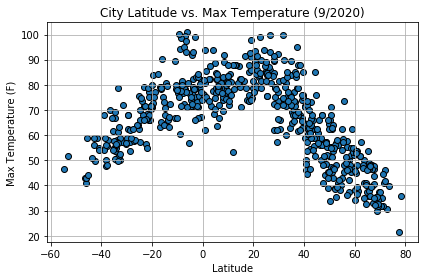

In [29]:
# Plot the graph
plt.scatter(lat, temp, marker="o", facecolors="tab:blue", edgecolors="black")

# Setting the title and axises 
plt.title("City Latitude vs. Max Temperature (9/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Add in a grid for the chart
plt.grid()

# Save our graph and show the grap
plt.tight_layout()
plt.savefig("../Images/city_lat_vs_max_temp.png")
plt.show()

## Latitude vs. Humidity Plot

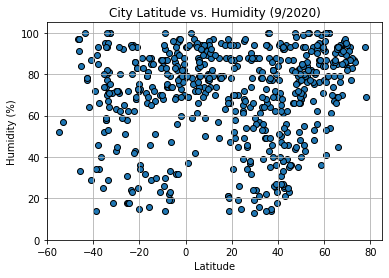

In [30]:
# Plot the graph
plt.scatter(lat, humidity, marker="o", facecolors="tab:blue", edgecolors="black")

# Setting the title and axises 
plt.title("City Latitude vs. Humidity (9/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Add in a grid for the chart
plt.grid()

# Setting graph limits
plt.xlim(-60, 85)
plt.ylim(0, 105)

# Save our graph and show the grap
#plt.tight_layout()
plt.savefig("../Images/city_lat_vs_humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

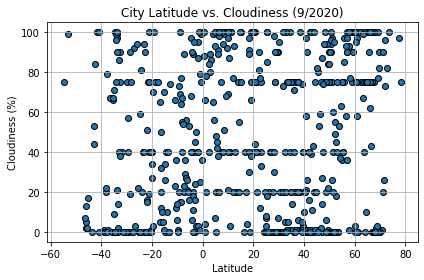

In [31]:
# Plot the graph
plt.scatter(lat, cloudiness, marker="o", facecolors="tab:blue", edgecolors="black")

# Setting the title and axises 
plt.title("City Latitude vs. Cloudiness (9/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Add in a grid for the chart
plt.grid()

# Save our graph and show the grap
plt.tight_layout()
plt.savefig("../Images/city_lat_vs_cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

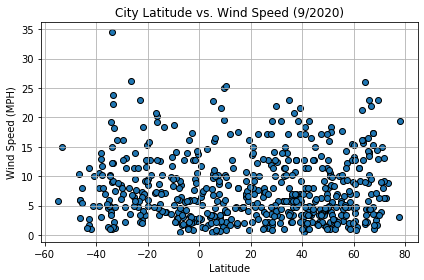

In [32]:
# Plot the graph
plt.scatter(lat, wind, marker="o", facecolors="tab:blue", edgecolors="black")

# Setting the title and axises 
plt.title("City Latitude vs. Wind Speed (9/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")

# Add in a grid for the chart
plt.grid()

# Save our graph and show the grap
plt.tight_layout()
plt.savefig("../Images/city_lat_vs_wind_speed.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R Val is 0.6788626102608093


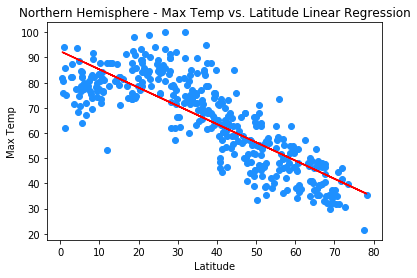

In [33]:
north_hem = weather_data_df.loc[weather_data_df['Lat'] > 0,]

plt.scatter(north_hem['Lat'], north_hem['Max Temp'], marker="o", facecolors="dodgerblue")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

x_values = north_hem['Lat']
y_values = north_hem['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R Val is 0.6788626102608093


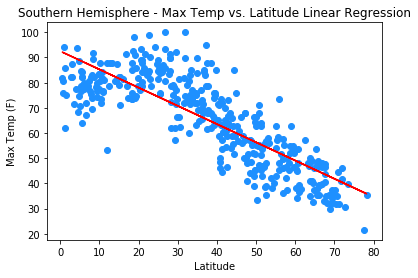

In [34]:
south_hem = weather_data_df.loc[weather_data_df['Lat'] > 0,]

plt.scatter(south_hem['Lat'], south_hem['Max Temp'], marker="o", facecolors="dodgerblue")

plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

x_values = south_hem['Lat']
y_values = south_hem['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R Val is 0.0107095832315636


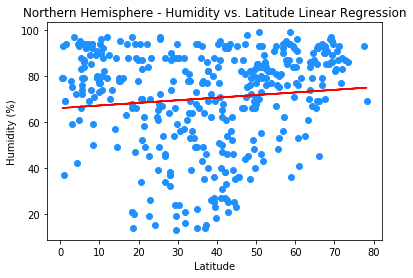

In [35]:
north_hem = weather_data_df.loc[weather_data_df['Lat'] > 0,]

plt.scatter(north_hem['Lat'], north_hem['Humidity'], marker="o", facecolors="dodgerblue")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")

x_values = north_hem['Lat']
y_values = north_hem['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R Val is 0.0107095832315636


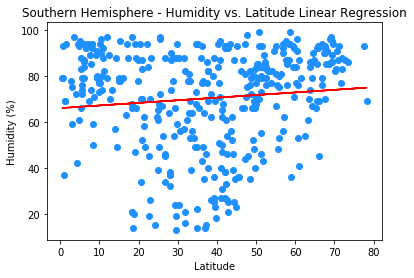

In [41]:
south_hem = weather_data_df.loc[weather_data_df['Lat'] > 0,]

plt.scatter(south_hem['Lat'], south_hem['Humidity'], marker="o", facecolors="dodgerblue")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")

x_values = south_hem['Lat']
y_values = south_hem['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R Val is 0.0008664277644958032


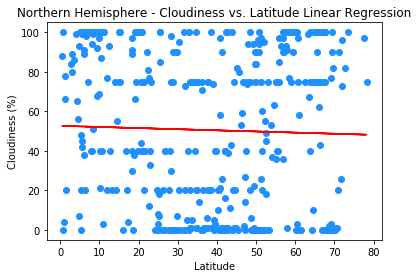

In [37]:
north_hem = weather_data_df.loc[weather_data_df['Lat'] > 0,]

plt.scatter(north_hem['Lat'], north_hem['Cloudiness'], marker="o", facecolors="dodgerblue")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")

x_values = north_hem['Lat']
y_values = north_hem['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R Val is 0.0008664277644958032


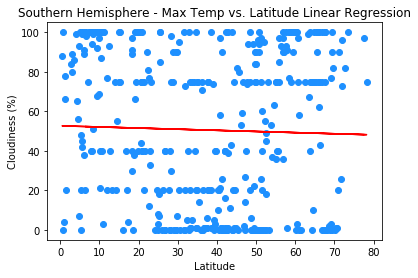

In [38]:
south_hem = weather_data_df.loc[weather_data_df['Lat'] > 0,]

plt.scatter(south_hem['Lat'], south_hem['Cloudiness'], marker="o", facecolors="dodgerblue")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

x_values = south_hem['Lat']
y_values = south_hem['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R Val is 0.005672595042264771


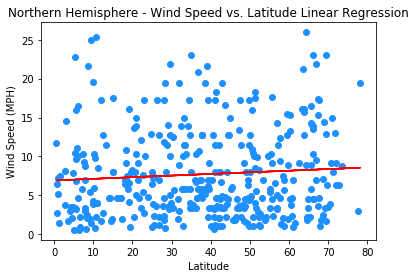

In [39]:
north_hem = weather_data_df.loc[weather_data_df['Lat'] > 0,]

plt.scatter(north_hem['Lat'], north_hem['Wind Speed'], marker="o", facecolors="dodgerblue")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")

x_values = north_hem['Lat']
y_values = north_hem['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R Val is 0.005672595042264771


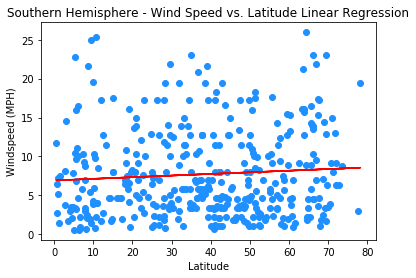

In [40]:
south_hem = weather_data_df.loc[weather_data_df['Lat'] > 0,]

plt.scatter(south_hem['Lat'], south_hem['Wind Speed'], marker="o", facecolors="dodgerblue")

plt.xlabel('Latitude')
plt.ylabel('Windspeed (MPH)')
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")

x_values = south_hem['Lat']
y_values = south_hem['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")